# Fundamentos Físicos de la Informática: Laboratorio SPICE

## 1. Preguntas

### Enumera todos los intérprete de Spice que puedas encontrar. Crea una tabla en Markdown con varias columnas (para el nombre, fabricante, versión actual, licencia y alguna característica sobresaliente). Aquí tienes un ejemplo del que puedes partir y seguir completando:

| Intérprete | Licencia | Fabricante         | Características  |
| --- | --- | --- | --: | 
|Ahkab      | GPL      | Giuseppe Venturini | Basado en Python |
|SPICE 1    | Public Domain Software | Laurence Nagel | Primera versión de SPICE. Desarrolada en Fortran |
|ngspice    | BSD      | Grupo abierto de desarrolladores | Basado en la última versión que Berkeley produjo |
|XSPICE     | Public Domain Software | Georgia Tech.  | Extensión del ngspice. Simulación mixta analógico y digital |
|LTSpice    | Freeware |Analog Devices (originalmente Linear Technology) | Visualizador de forma de onda |
|OrCAD PSpice Designer | Comercial | OrCAD | Aquitectura abierta para que cada cliente pueda configurar su solución a medida |

### ¿Qué comparación puedes efectuar entre C y SPICE como estándares (lenguajes) y sus respectivas implementaciones en software? ¿Qué implementaciones reales (compiladores) del lenguaje C conoces?

Ambos son estándares internacionales en la creación de software `C` y de simulación de circuitos `SPICE`. En el caso del lenguaje C, este se encuentra estandarizado actualmente por el organismo ISO (en sus principios estuvo estandarizado por ANSI).
Por una parte el estándar define **lo** que ha de hacer el lenguaje pero no el **como**.
Por así decirlo tanto el estandar C como el SPICE, son unas guías de como debe de ser un programa capaz de interpretar un programa en C (y compilarlo y enlazarlo) y en el caso de SPICE, las normas para hacerle llegar a este los datos de los circuitos a analizar.

Implementaciones reales que conozco de C, por ejemplo, GCC realizado por GNU. Visual Studio C/C++ creado por la compañía Microsoft. Hace ya bastantes años utilicé durante un tiempo Borland C++ que era la implementación que realizaba Borland de este lenguaje.

### Crea una tabla en Markdown con todos los prefijos de múltiplos que puedas, su abreviatura y su equivalencia numérica.

| Prefijo | Abreviatura | Eq. numérica |
 | --- | :-: | --: |
 | Exa | E | $10^{18}$ |
 | Peta | P | $10^{15}$ |
 | Tera | T | $10^{12}$ |
 | Giga | G | $10^{9}$ |
 | Mega | M | $10^{6}$ |
 | Kilo | k | $10^{3}$ |
 | Hecto | h | $10^{2}$ |
 | Deca | da | $10^{1}$ |
 | Deci | d | $10^{-1}$ |
 | Centi | c | $10^{-2}$ | 
 | Mili | m | $10^{-3}$ |
 | Micro| $\mu$ | $10^{-6}$| 
 | Nano | n | $10^{-9}$ |
 | Pico | p | $10^{-12}$ |
 | Femto | f | $10^{-15}$ |
 | Atto | a | $10^{-18}$ |

### ¿Qué unidades del Sistema Internacional relacionadas con la asignatura –y los circuitos en general– conoces? Responde aquí mismo en una celda de Markdown con una tabla.

| Nombre de unidad | Símbolo | Magnitud representada |
|--- |--- |--- |
|Amperio |A |Intensidad de la corriente eléctrica |
|Culombio |C |Carga eléctrica | 
|Voltio |V |Diferencia de potencial | 
|Ohmio |$\Omega$ |Resistencia eléctrica de un material |
|Watio |W |Potencia eléctrica | 
|Hertzio |Hz |Frecuencia |
|Faradio|F|Capacidad entre las placas de un condensador|


### Hasta lo que has visto del lenguaje Spice, ¿dentro de qué tipo o conjunto de lenguajes encajaría? ¿Funcionales? ¿Específicos de dominio? ¿Procedurales? ¿Estructurados? ¿Orientado a Objetos ¿Funcionales? Justifica tu respuesta.

En mi opinión encaja en la definición de un lenguaje declarativo. Declaramos el circuito y el intérprete de SPICE hace el resto. No hacemos uso de ningún aspecto de programación imperativa y simplemente dejamos que internamente SPICE resuelva.

### El parámetro uic puede tener varios valores y cada uno significa una cosa. Detállalo usando un celda Markdown y consultando la documentación de Ahkab.

| Valor de UIC | Significado |
|--- |---|
|0 |Se asumen todos las corrientes y voltajes de nodos a 0 |
|1 |Se toman los valores del anterior análisis OP |
|2 |Se toman los valores del anterior análisis OP donde se han fijado los valores corriente/voltaje en condensadores y bobinas |
|3 |Se utiliza un fichero .ic proporcionado por el usuario con el estado |

### ¿Qué es y para qué sirve PyLab?

`PyLab` es una *suite* que incluye los paquetes numpy, scipy, sympy, pandas, matplotlib, ipython para Python. Todos orientados al trabajo científico en dicho lenguaje.

$$
 V = I\cdot R
 $$

### Comprueba que la ecuación anterior está ajustada a nivel dimensional, es decir, que la naturaleza de lo que está a ambos lados del signo igual es la misma. Realiza este ejercicio con LaTeX en una celda Markdown.

 $$
 V = I\cdot R \rightarrow V = A \cdot \Omega \rightarrow \frac{J}{C} = \frac{C}{s} \cdot \frac{\frac{J}{C}}{\frac{C}{s}} \rightarrow \frac{J}{C} = \frac{J}{C}
 $$

### ¿Qué significan las opciones `-b` y `-ascii` cuando llamamos al ejecutable de LTSpice? 



La opcion **-b** hace funcionar LTSpice por lotes y transforma los **.cir** a **.raw** La opción **-ascii** indica que los ficheros que recibirá son texto ASCII y según la documentación desgrada seriamente el rendimiento del programa.

***

## 2. Sección de carga de bibliotecas e instalación de dependencias.

In [1]:
import pylab as plt
import ahkab # Módulo de Python con el que podemos realizar cálculo de circuitos y que utilizaremos en este notebook.
from sympy.physics.units import kilo, volts, ohms, amperes # Unidades y multiplicadores 
from sympy.physics.units.util import convert_to # Utilidad para convertir unidades
from sympy import solve, symbols, Eq # Solucionar ecuaciones simbólicas, simbolos y editor de ecucaciones.

import platform
%alias lts /Applications/LTspice.app/Contents/MacOS/LTspice -ascii -b
if platform.system() == "Windows":
    %alias lts C:\Program Files\LTC\LTspiceXVII\XVIIx64.exe -ascii -b

#!pip install ltspice

import ltspice
import pandas as pd #No he sido capaz de acceder a Pandas desde Pylab, como desconozco si es problema local, importo Pandas para usar el CSV en GNUPlot
from ahkab import circuit, printing, time_functions, new_tran, run

W: Locale appears not set! please export LANG="en_US.UTF-8" or equivalent, 
W: or ahkab's unicode support is broken.


***

## 3. Ejercicios en SPICE
### 1. Utilizando ahkab

Para comenzar con SPICE, analizaremos este sencillo circuito:

![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/primer%20circuito.svg?sanitize=true)

Escribimos, en el formato *netlist* de SPICE los componentes de nuestro circuito. Con la orden `%%writefile "sencillo.sp"`escribimos en un fichero externo dicha lista.

In [2]:
%%writefile "sencillo.sp"
* Circuito con una sola fuente de tensión y una resistencia
r1 1 0 100
v1 0 1 type=vdc vdc=9
.op
.dc v1 start=0 stop=9 step=1
.end

Overwriting sencillo.sp


Realizaremos el análisis con `ahkab` que hemos importado previamente en la sección destinada a tal fin. Utilizamos el parser que viene incluído en el módulo para leer *netlists*. Y posteriormente analizamos el mismo.

In [3]:
circuito_y_analisis = ahkab.netlist_parser.parse_circuit('sencillo.sp')
lista_de_analisis = ahkab.netlist_parser.parse_analysis(circuito_y_analisis[0], circuito_y_analisis[1])
lista_de_analisis

[{'type': 'op', 'guess': True, 'x0': None},
 {'type': 'dc',
  'source': 'v1',
  'start': 0.0,
  'stop': 9.0,
  'step': 1.0,
  'sweep_type': 'LIN'}]

En otro enunciado de la práctica nos pregunta que tipo de estructura de Python es `lista_de_analisis`. Respondemos preguntándoselo a Python mediante la funcion `type()`

In [4]:
print(type(lista_de_analisis))
#Por curiosidad miramos los tipos de datos que componen la lista
[type(i) for i in lista_de_analisis]

<class 'list'>


[dict, dict]

Python nos informa de que es un objeto de tipo lista. No obstante mirando los elementos que componen la lista, nos damos cuenta que es una lista de diccionarios (tablas hash en python).

Para poder realizar los análisis debemos de generar unos ficheros temporales intermedios donde guardar estas listas. Debemos agregar una nueva entrada en la lista `outfile` solo en aquellas entradas en las que el tipo sea `dc` o `tran`. Para ello realizamos la siguiente operación en python.

In [5]:
indices_que_precisan_outfile = [i for i,d in enumerate(lista_de_analisis) if 'dc' in d.values() or 'tran' in d.values()]

for i in indices_que_precisan_outfile:
    lista_de_analisis[i]['outfile']='Temporal'+str(lista_de_analisis[i]['type'])+'.tsv'

print(lista_de_analisis)
resultados = ahkab.run(circuito_y_analisis[0], lista_de_analisis) #Calculamos los resultados de esta forma van a un fichero
print(resultados['dc'])
print("Podemos graficar los siguientes resultados:" + str(resultados['dc'].keys()))

[{'type': 'op', 'guess': True, 'x0': None}, {'type': 'dc', 'source': 'v1', 'start': 0.0, 'stop': 9.0, 'step': 1.0, 'sweep_type': 'LIN', 'outfile': 'Temporaldc.tsv'}]
Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
Starting DC analysis:
Solving...  done
<DC simulation results for '* circuito con una sola fuente de tensión y una resistencia' (netlist sencillo.sp). LIN sweep of V1 from 0 to 9 V. Run on 2021-01-03 17:17:20, data file Temporaldc.tsv>
Podemos graficar los siguientes resultados:['V1', 'V1', 'I(V1)']


Como en el ejemplo, graficamos la relación entre $\frac{V1}{I(V1)}$ 
Para ello utilizaremos `matplotlib` que viene incluído en la *suite* `PyLab`

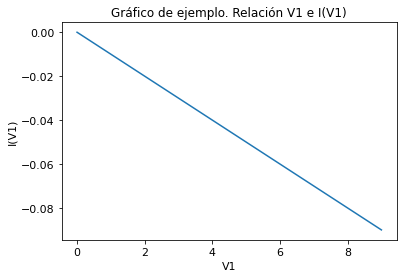

In [6]:
plt.plot(resultados['dc']['V1'],resultados['dc']['I(V1)'], label = 'Voltaje V1')
plt.xlabel("V1")
plt.ylabel("I(V1)")
plt.title("Gráfico de ejemplo. Relación V1 e I(V1)")
plt.show()

Podemos revisar los cálculos que el motor de SPICE ha hecho por nosotros. Para ello, accedemos:

In [7]:
print(resultados['op'].results)

{V1: -9.0, I(V1): -0.09}


Repetimos este cálculo mediante la ley de Ohm y posteriormente con sympy. 

$$
 I = \frac{V}{R} \rightarrow I = \frac{9v}{100 \Omega} \rightarrow I = 0.09A
$$

In [8]:
v1 = 9*volts
r1 = 100*ohms
intensidad = symbols('i')
ley_ohm = Eq(v1, intensidad*r1)
solucion_para_intensidad = solve(ley_ohm, intensidad)
convert_to(solucion_para_intensidad[0], [amperes]).n(2)

0.09*ampere

### 2. Utilizando LTSpice

En la sección de carga de bibliotecas hemos añadido un alias para hacer funcionar el ejecutable de LTSpice desde este notebook. La sintaxis es diferente sobretodo en las fuentes de alimentación.

In [9]:
%%writefile "dcsencillo.net"
* Este es un circuito sencillo adaptado para LTspice
r1 1 0 100
v1 0 1 9
.op
* Comentamos el análisis .dc para centrarnos primero en el .op
.dc v1 1 10 
.end

Overwriting dcsencillo.net


In [10]:
lts dcsencillo.net

In [11]:
#%pycat dcsencillo.log

Text(0, 0.5, 'Voltaje')

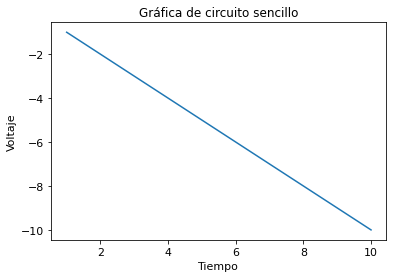

In [12]:
l = ltspice.Ltspice("dcsencillo.raw")
l.parse()
time = l.get_time()
V1 = l.get_data('V(1)')
plt.plot(time, V1)
plt.title("Gráfica de circuito sencillo")
plt.xlabel("Tiempo")
plt.ylabel("Voltaje")

Ahkab también incluye un intérprete que funciona en línea de órdenes:

In [13]:
!ahkab "sencillo.sp"

W: Locale appears not set! please export LANG="en_US.UTF-8" or equivalent, 
W: or ahkab's unicode support is broken.
2021-01-03 17:17:23
ahkab v. 0.18 (c) 2006-2015 Giuseppe Venturini

Operating Point (OP) analysis

Netlist: sencillo.sp
Title: * circuito con una sola fuente de tensión y una resistencia
At 300.00 K
Options:
	vea = 1.000000e-06
	ver = 0.001000
	iea = 1.000000e-09
	ier = 0.001000
	gmin = 0.000000e+00

Convergence reached in 2 iterations.

RESULTS:

Variable    Units      Value        Error    %
----------  -------  -------  -----------  ---
V1          V          -9     9.00001e-12    0
I(V1)       A          -0.09  0              0

ELEMENTS OP INFORMATION:

Part ID      R [Ω]    V(n1,n2) [V]    I(n1->n2) [A]    P [W]
---------  -------  --------------  ---------------  -------
R1             100              -9            -0.09     0.81

Part ID      V(n1,n2) [V]    I(n1->n2) [A]    P [W]
---------  --------------  ---------------  -------
V1                      9     

Ejercicio premium: Graficar con gnuplot los anteriores datos.

In [14]:
l.data_raw.shape
type(l.data_raw)
sliced_data = l.data_raw[...,:2]
pd.DataFrame(sliced_data).to_csv("gnuplot.csv",header=False,index=False)
!gnuplot -p grafico.gnuplot

zsh:1: command not found: gnuplot


### 3. Resistencias en serie

Analizaremos este circuito, primero con la sintaxis de `ahkab`

![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/resistencias%20en%20serie.svg?sanitize=true)


In [15]:
%%writefile "resistencias en serie.net"
* circuito con tres resistencias en serie
v1 1 0 type=vdc vdc=9
R1 0 2 3k
R2 2 3 10k  
R3 3 1 5k
* análisis del circuito
.op
.end

Overwriting resistencias en serie.net


In [16]:
circuito_y_analisis = ahkab.netlist_parser.parse_circuit('resistencias en serie.net')
lista_de_analisis = ahkab.netlist_parser.parse_analysis(circuito_y_analisis[0], circuito_y_analisis[1])
indices_que_precisan_outfile = [i for i,d in enumerate(lista_de_analisis) if 'dc' in d.values() or 'tran' in d.values()]

for i in indices_que_precisan_outfile:
    lista_de_analisis[i]['outfile']='Temporal'+str(lista_de_analisis[i]['type'])+'.tsv'

print(lista_de_analisis)
resultados = ahkab.run(circuito_y_analisis[0], lista_de_analisis) #Calculamos los resultados de esta forma van a un fichero
print(resultados['op'])
print("Podemos graficar los siguientes resultados:" + str(resultados['op'].keys()))

[{'type': 'op', 'guess': True, 'x0': None}]
Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
OP simulation results for '* circuito con tres resistencias en serie'(netlist resistencias en serie.net).
Run on 2021-01-03 17:17:23, data file None.
Variable    Units      Value     Error    %
----------  -------  -------  --------  ---
V1          V         9       -9e-12      0
V2          V         1.5     -1.5e-12    0
V3          V         6.5     -6.5e-12    0
I(V1)       A        -0.0005   0          0
Podemos graficar los siguientes resultados:['V1', 'V2', 'V3', 'I(V1)']


Los cantidades `V1`, `V2` y `V3` hacen referencia a los distintos valores del potencial que se ha perdido en cada uno de los bornes que has elegido para describir el netlist (`1`, `2`, etc.). Por ejemplo, podemos calcular el *potencial consumido* por la resistencia `R1` y verás que coincide con el del punto `V2` devuelto por Ahkab. **Ejercicio**: compruébalo tú mismo y refléjalo por escrito.

In [17]:
r1 = 3E3*ohms
intensidad_ahkab = resultados['op']['I(V1)'][0][0]*amperes
v2 = convert_to(intensidad_ahkab*r1, [volts])
v2

-1.5*volt

Reproduce el resto de los valores anteriores de manera *manual* mediante Sympy (es decir, aplicando la ley de Ohm, pero con un *toque computacional*).

In [18]:
v1 = 9*volts
r1 = 3*kilo*ohms
r2 = 10*kilo*ohms
r3 = 5*kilo*ohms
r_total = r1 + r2 + r3
intensidad = symbols('i')
ley_ohm = Eq(v1, intensidad*r_total)
solucion_para_intensidad = solve(ley_ohm, intensidad)
i_v1 = convert_to(solucion_para_intensidad[0], [amperes]).n(2)

v_en_r1 = symbols('v_r1')
ley_ohm = Eq(v_en_r1, solucion_para_intensidad[0]*r1)
solucion_v_en_r1 = solve(ley_ohm, v_en_r1)
v_1 = convert_to(solucion_v_en_r1[0], [volts]).n(2)

# v entre nodos 0 y 3
v_en_r2 = symbols('v_r2')
ley_ohm = Eq(v_en_r2, solucion_para_intensidad[0]*(r1 + r2))
solucion_v_en_r2 = solve(ley_ohm, v_en_r2)
v_2 = convert_to(solucion_v_en_r2[0], [volts]).n(2)

# v entre nodos 0 y 1
v_en_r3 = symbols('v_r3')
ley_ohm = Eq(v_en_r3, solucion_para_intensidad[0]*r_total)
solucion_v_en_r3 = solve(ley_ohm, v_en_r3)
v_3 = convert_to(solucion_v_en_r3[0], [volts]).n(2)

print("Intensidad")
i_v1

Intensidad


0.0005*ampere

In [19]:
print("Voltaje entre nodos 0 y 2")
v_1

Voltaje entre nodos 0 y 2


1.5*volt

In [20]:
print("Voltaje entre nodos 0 y 3")
v_2

Voltaje entre nodos 0 y 3


6.5*volt

In [21]:
print("Voltaje entre nodos 0 y 1")
v_3

Voltaje entre nodos 0 y 1


9.0*volt

Demuestra que se cumple la Ley de Kirchhoff de la energía en un circuito, es decir, que la suma de la energía suministrada por las fuentes (pilas) es igual a la consumida por las resistencias. Realiza la operación con Sympy.

$$
\sum_i^N V_{\text{fuentes}} = \sum_j^M V_{\text{consumido en resistencias}}
$$

In [22]:
v_en_r1 = symbols('v_r1')
ley_ohm = Eq(v_en_r1, solucion_para_intensidad[0]*r1)
solucion_v_en_r1 = solve(ley_ohm, v_en_r1)
v_1 = convert_to(solucion_v_en_r1[0], [volts]).n(2)

v_en_r2 = symbols('v_r2')
ley_ohm = Eq(v_en_r2, solucion_para_intensidad[0]*r2)
solucion_v_en_r2 = solve(ley_ohm, v_en_r2)
v_2 = convert_to(solucion_v_en_r2[0], [volts]).n(2)

v_en_r3 = symbols('v_r3')
ley_ohm = Eq(v_en_r3, solucion_para_intensidad[0]*r3)
solucion_v_en_r3 = solve(ley_ohm, v_en_r3)
v_3 = convert_to(solucion_v_en_r3[0], [volts]).n(2)
v_1

1.5*volt

In [23]:
v_2

5.0*volt

In [24]:
v_3

2.5*volt

In [25]:
v_1 + v_2 + v_3

9.0*volt

Coincide con el valor de la fuente.

### 4. Resistencias en paralelo.

Vamos a analizar los siguientes circuitos utilizando para ello ahkab.

 ![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/resistencias%20en%20paralelo.svg?sanitize=true)


### NOTA: En los cálculos que se realizan para demostrar Kirchoff se ha cambiado el signo de la intensidad que solamente indica la dirección de la misma. Haciendo pruebas no he llegado a la conclusión de como orientar las corrientes en la misma dirección de otra forma.

#### Circuito 1

In [26]:
%%writefile "resistencias en paralelo 1.cir"
* resistencias en paralelo
vdd 0 1 vdc=12 type=vdc
* Añadimos varias fuentes con voltaje 0
vdummy 4 2 vdc=0 type=vdc 
vdummy2 2 5 vdc=0 type=vdc
r2 1 2 1k
r3 2 5 220
r4 3 0 1.5k
r5 4 0 470
.op
.end

Overwriting resistencias en paralelo 1.cir


In [27]:
%%writefile "resistencias en paralelo 1.cir"
* resistencias en paralelo
vdd 0 1 vdc=12 type=vdc
* Añadimos varias fuentes con voltaje 0
vdummy 2 4 vdc=0 type=vdc 
vdummy2 5 3 vdc=0 type=vdc
r2 1 2 1k
r3 2 3 220
r4 5 0 1.5k
r5 4 0 470
.op
.end

Overwriting resistencias en paralelo 1.cir


In [28]:
circuito_y_analisis = ahkab.netlist_parser.parse_circuit('resistencias en paralelo 1.cir')
lista_de_analisis = ahkab.netlist_parser.parse_analysis(circuito_y_analisis[0], circuito_y_analisis[1])
lista_de_analisis

[{'type': 'op', 'guess': True, 'x0': None}]

In [29]:
indices_que_precisan_outfile = [i for i,d in enumerate(lista_de_analisis) if 'dc' in d.values() or 'tran' in d.values()]

for i in indices_que_precisan_outfile:
    lista_de_analisis[i]['outfile']='Temporal'+str(lista_de_analisis[i]['type'])+'.tsv'

print(lista_de_analisis)
resultados = ahkab.run(circuito_y_analisis[0], lista_de_analisis) #Calculamos los resultados de esta forma van a un fichero
print(resultados['op'])
i_vdd = float(resultados['op']['I(VDD)'])
i_vdummy = float(resultados['op']['I(VDUMMY)'])
i_vdummy2 = float(resultados['op']['I(VDUMMY2)'])

i_ent_nudo_2 = plt.around(-i_vdd,5)
i_saliente_nudo_2 = plt.around(-i_vdummy + i_vdummy2,5)
print("Intensidad entrante en nudo 2:",plt.around(-i_vdd,5))
print("Intensidad saliente del nudo 2:",plt.around(-i_vdummy + i_vdummy2,5))
print("Ley de kirchoff ",i_ent_nudo_2 == i_saliente_nudo_2)


[{'type': 'op', 'guess': True, 'x0': None}]
Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
OP simulation results for '* resistencias en paralelo'(netlist resistencias en paralelo 1.cir).
Run on 2021-01-03 17:17:24, data file None.
Variable    Units           Value        Error    %
----------  -------  ------------  -----------  ---
V1          V        -12           1.2e-11        0
V2          V         -3.23533     3.23533e-12    0
V4          V         -3.23533     3.23533e-12    0
V5          V         -2.8215      2.82151e-12    0
V3          V         -2.8215      2.82151e-12    0
I(VDD)      A         -0.00876467  0              0
I(VDUMMY)   A         -0.00688367  0              0
I(VDUMMY2)  A          0.001881    0              0
Intensidad entrante en nudo 2: 0.00876
Intensidad saliente del nudo 2: 0.00876
Ley de kirchoff  Tru

***

Posteriormente vamos a realizar los cálculos de este circuito mediante `sympy`

In [30]:
v1 = 12*volts
r1 = 1*kilo*ohms
r2 = 470*ohms
r3 = 220*ohms
r4 = 1.5*kilo*ohms

# Calculamos la resistencia equivalente

r_total = r1 + 1/(1/r2+1/(r3+r4))
intensidad = symbols('i')
ley_ohm = Eq(v1, intensidad*r_total)
solucion_para_intensidad = solve(ley_ohm, intensidad)
i_v1 = convert_to(solucion_para_intensidad[0], [amperes]).n(2)
i_v1

0.0088*ampere

#### Circuito 2

In [31]:
%%writefile "resistencias en paralelo 2.cir"
* resistencias en paralelo
vdd 0 1 vdc=9 type=vdc
v2 0 3 vdc=1.5 type=vdc
vdummy 5 6 vdc=0 type=vdc
r1 1 2 47
r2 2 4 220
r3 2 3 180
r4 4 5 1k
r5 6 0 560
.op
.end

Overwriting resistencias en paralelo 2.cir


In [32]:
circuito_y_analisis = ahkab.netlist_parser.parse_circuit('resistencias en paralelo 2.cir')
lista_de_analisis = ahkab.netlist_parser.parse_analysis(circuito_y_analisis[0], circuito_y_analisis[1])
indices_que_precisan_outfile = [i for i,d in enumerate(lista_de_analisis) if 'dc' in d.values() or 'tran' in d.values()]

for i in indices_que_precisan_outfile:
    lista_de_analisis[i]['outfile']='Temporal'+str(lista_de_analisis[i]['type'])+'.tsv'

print(lista_de_analisis)
resultados = ahkab.run(circuito_y_analisis[0], lista_de_analisis) #Calculamos los resultados de esta forma van a un fichero
print(resultados['op'])
i_vdd = resultados['op']['I(VDD)']
i_v2 = resultados['op']['I(V2)']
i_vdummy = resultados['op']['I(VDUMMY)']
print("Kirchoff en el nudo 0: ",plt.around(-i_vdd,5) == plt.around(i_v2,5) + plt.around(-i_vdummy,5))

[{'type': 'op', 'guess': True, 'x0': None}]
Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
OP simulation results for '* resistencias en paralelo'(netlist resistencias en paralelo 2.cir).
Run on 2021-01-03 17:17:25, data file None.
Variable    Units          Value        Error    %
----------  -------  -----------  -----------  ---
V1          V        -9           8.99998e-12    0
V3          V        -1.5         1.5e-12        0
V5          V        -2.29487     2.29487e-12    0
V6          V        -2.29487     2.29487e-12    0
V2          V        -7.29441     7.29442e-12    0
V4          V        -6.39285     6.39286e-12    0
I(VDD)      A        -0.0362891   0              0
I(V2)       A         0.0321912   0              0
I(VDUMMY)   A        -0.00409798  0              0
Kirchoff en el nudo 0:  [[ True]]


In [33]:
v1 = 9*volts
v2 = 1.5*volts
r1 = 47*ohms
r2 = 220*ohms
r3 = 180*ohms
r4 = 1*kilo*ohms
r5 = 560*ohms

# Calculamos la resistencia equivalente

r_total = r1 + 1/(1/r3 + 1/(r2+r4+r5))
intensidad = symbols('i')
ley_ohm = Eq(v1-v2, intensidad*r_total)
solucion_para_intensidad = solve(ley_ohm, intensidad)
i_v1 = convert_to(solucion_para_intensidad[0], [amperes]).n(2)
i_v1

0.036*ampere

Hemos calculado la intensidad total en el circuito.

#### Circuito 3

In [34]:
%%writefile "resistencias en paralelo 3.cir"
* resistencias en paralelo
vdd 0 1 vdc=9 type=vdc
v1 1 5 vdc=0 type=vdc
v2 1 6 vdc=0 type=vdc
v3 1 7 vdc=0 type=vdc

r1 5 0 10k
r2 6 0 2k
r3 7 0 1k
.op
.end

Overwriting resistencias en paralelo 3.cir


In [35]:
circuito_y_analisis = ahkab.netlist_parser.parse_circuit('resistencias en paralelo 3.cir')
lista_de_analisis = ahkab.netlist_parser.parse_analysis(circuito_y_analisis[0], circuito_y_analisis[1])
indices_que_precisan_outfile = [i for i,d in enumerate(lista_de_analisis) if 'dc' in d.values() or 'tran' in d.values()]

for i in indices_que_precisan_outfile:
    lista_de_analisis[i]['outfile']='Temporal'+str(lista_de_analisis[i]['type'])+'.tsv'

print(lista_de_analisis)
resultados = ahkab.run(circuito_y_analisis[0], lista_de_analisis) #Calculamos los resultados de esta forma van a un fichero
print(resultados['op'])

i_vdd = float(resultados['op']['I(VDD)'])
i_vdd1 = float(resultados['op']['I(V1)'])
i_vdd2 = float(resultados['op']['I(V2)'])
i_vdd3 = float(resultados['op']['I(V3)'])

print("Nudo 1: ",i_vdd )
print("Nudo 1 saliente: ",i_vdd1 + i_vdd2 + i_vdd3)
print("Ley de Kirchoff ",plt.around(i_vdd,5) == plt.around(i_vdd1,5) + plt.around(i_vdd2,5) + plt.around(i_vdd3,5))

[{'type': 'op', 'guess': True, 'x0': None}]
Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
OP simulation results for '* resistencias en paralelo'(netlist resistencias en paralelo 3.cir).
Run on 2021-01-03 17:17:25, data file None.
Variable    Units      Value    Error    %
----------  -------  -------  -------  ---
V1          V        -9         9e-12    0
V5          V        -9         9e-12    0
V6          V        -9         9e-12    0
V7          V        -9         9e-12    0
I(VDD)      A        -0.0144    0        0
I(V1)       A        -0.0009    0        0
I(V2)       A        -0.0045    0        0
I(V3)       A        -0.009     0        0
Nudo 1:  -0.014400000000000003
Nudo 1 saliente:  -0.014400000000000001
Ley de Kirchoff  True


In [36]:
v1 = 9*volts
r1 = 10*kilo*ohms
r2 = 2*kilo*ohms
r3 = 1*kilo*ohms

# Calculamos la resistencia equivalente

r_total = 1 / (1/r1 + 1/r2 + 1/r3)
intensidad = symbols('i')
ley_ohm = Eq(v1, intensidad*r_total)

solucion_para_intensidad = solve(ley_ohm, intensidad)
i_v1 = convert_to(solucion_para_intensidad[0], [amperes]).n(2)
i_v1

intensidad_r1 = symbols('i')
i_r1 = Eq(intensidad_r1, i_v1 * r1 / (r1+r2+r3))
solucion_ir1 = solve(i_r1, intensidad_r1)
i_r1 = convert_to(solucion_ir1[0], [amperes]).n(2)
i_r1

intensidad_r2 = symbols('i')
i_r2 = Eq(intensidad_r2, i_v1 * r2 / (r1+r2+r3))
solucion_ir2 = solve(i_r2, intensidad_r2)
i_r2 = convert_to(solucion_ir2[0], [amperes]).n(2)
i_r2

intensidad_r3 = symbols('i')
i_r3 = Eq(intensidad_r3, i_v1 * r3 / (r1+r2+r3))
solucion_ir3 = solve(i_r3, intensidad_r3)
i_r3 = convert_to(solucion_ir3[0], [amperes]).n(2)

i_v1

0.014*ampere

Aplicamos divisores de corriente para averiguar la intensidad en cada rama.

In [37]:
i_r1

0.011*ampere

In [38]:
i_r2

0.0022*ampere

In [39]:
i_r3

0.0011*ampere

#### 5. Régimen transitorio

Analizaremos el siguiente circuito que al contar con un condensador evolucionará en el tiempo. Por lo tanto debemos analizar el mismo en régimen transitorio.

![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/condensador%20en%20continua.svg?sanitize=true)


In [40]:
%%writefile "condensador en continua.ckt"
* Carga condensador
v1 0 1 type=vdc vdc=6
r1 1 2 1k
c1 2 0 1m ic=0
.op
.tran tstep=0.1 tstop=8 uic=0
.end

Overwriting condensador en continua.ckt


In [41]:
circuito_y_analisis = ahkab.netlist_parser.parse_circuit('condensador en continua.ckt')
lista_de_analisis = ahkab.netlist_parser.parse_analysis(circuito_y_analisis[0], circuito_y_analisis[1])
indices_que_precisan_outfile = [i for i,d in enumerate(lista_de_analisis) if 'dc' in d.values() or 'tran' in d.values()]

for i in indices_que_precisan_outfile:
    lista_de_analisis[i]['outfile']='Temporal'+str(lista_de_analisis[i]['type'])+'.tsv'

print(lista_de_analisis)
resultados = ahkab.run(circuito_y_analisis[0], lista_de_analisis) #Calculamos los resultados de esta forma van a un fichero
print(resultados['op'])

[{'type': 'op', 'guess': True, 'x0': None}, {'type': 'tran', 'tstep': 0.1, 'tstop': 8.0, 'tstart': 0, 'x0': None, 'method': None, 'outfile': 'Temporaltran.tsv'}]
Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
Starting transient analysis: 
Selected method: TRAP
Solving...  done.
Average time step: 0.0869565
OP simulation results for '* carga condensador'(netlist condensador en continua.ckt).
Run on 2021-01-03 17:17:26, data file None.
Variable    Units      Value    Error    %
----------  -------  -------  -------  ---
V1          V             -6    6e-12    0
V2          V             -6    6e-12    0
I(V1)       A              0    0        0


Text(0, 0.5, 'Intensidad en la pila')

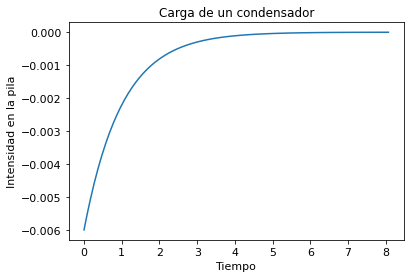

In [42]:
plt.plot(resultados['tran']['T'],resultados['tran']['I(V1)'])
plt.title("Carga de un condensador")
plt.xlabel("Tiempo")
plt.ylabel("Intensidad en la pila")

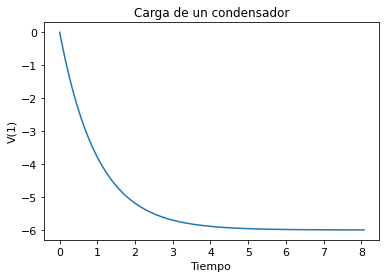

In [43]:

plt.plot(resultados['tran']['T'],resultados['tran']['V2'])
plt.title("Carga de un condensador")
plt.xlabel("Tiempo")
plt.ylabel("V(1)")
plt.savefig('v1_tiempo.svg',format='svg')

Cuando cargamos un condensador completamente este se comporta como un circuito abierto. Es decir, no circula corriente por él. Eso es lo que vemos en la gráfica cuando avanza el tiempo. En la medición de `V1` vemos que una vez el circuito alcanza el reposo y se produce el circuito abierto el voltaje es el mismo de la fuente ya que no está circulando corriente.
El análisis operacional `.op` nos da los valores en el reposo, es decir cuando el condensador se carga por completo. La intensidad que circula en el circuito es 0, por lo tanto, circuito abierto.


Analizamos el siguiente circuito. Al haber dos condensadores en paralelo que van a recibir la misma diferencia de potencial (por la configuración del circuito) cada uno tardará un tiempo diferente en cargarse completamente.

![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/condensadores%20en%20paralelo.svg?sanitize=true)

In [44]:
%%writefile "carrera en condensadores.ckt"
* Carga condensador
v0 0 1 type=vdc vdc=10
r1 0 2 3k
c1 2 3 47u ic=0
v1dummy 3 1 type=vdc vdc=0
c2 2 4 22u ic=0
v2dummy 4 1 type=vdc vdc=0
.tran tstep=0.01 tstart=6.5 tstop=7.5 uic=0
.end

Overwriting carrera en condensadores.ckt


Starting transient analysis: 
Selected method: TRAP
Solving...  done.
Average time step: 0.00900901


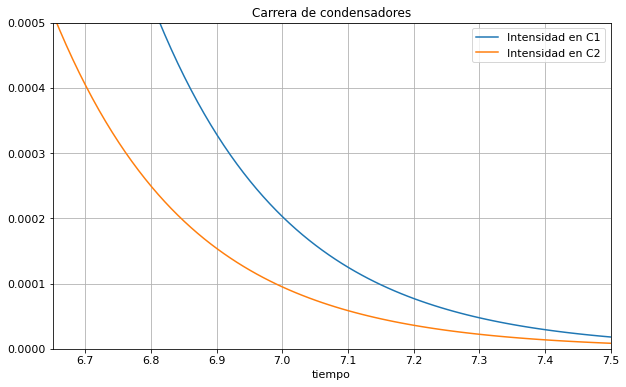

In [45]:
circuito_y_analisis = ahkab.netlist_parser.parse_circuit('carrera en condensadores.ckt')
lista_de_analisis = ahkab.netlist_parser.parse_analysis(circuito_y_analisis[0], circuito_y_analisis[1])
indices_que_precisan_outfile = [i for i,d in enumerate(lista_de_analisis) if 'dc' in d.values() or 'tran' in d.values()]

for i in indices_que_precisan_outfile:
    lista_de_analisis[i]['outfile']='Temporal'+str(lista_de_analisis[i]['type'])+'.tsv'

resultados = ahkab.run(circuito_y_analisis[0], lista_de_analisis) #Calculamos los resultados de esta forma van a un fichero

plt.figure(figsize=(10,6))
plt.title("Carrera de condensadores")
plt.xlim(6.65, 7.5)
plt.ylim(0.0, 0.0005)
plt.xlabel("tiempo")
plt.grid()
plt.plot(resultados['tran']['T'], resultados['tran']['I(V1DUMMY)'],label="Intensidad en C1")
plt.plot(resultados['tran']['T'], resultados['tran']['I(V2DUMMY)'],label="Intensidad en C2")
plt.legend()


Como vemos en la gráfica, por un pequeño margen gana la carrera de condensadores el sujeto C2.

#### 6. Corriente alterna

Resolvemos un circuito con una resistencia y una fuente de alterna $120V$ y %60Hz$. Resolvemos el mismo problema mediante `LTSpice` y `ahkab`.

Creamos un fichero con el formato que acepta `LTSpice` y mediante `matplotlib` graficamos.

In [46]:
%%writefile "corriente alterna.net"
* Circuito en corriente alterna
v1 1 0 sin(0 120 60 0 0)
r1 0 1 10k
.tran 1
.end

Overwriting corriente alterna.net


In [47]:
lts "corriente alterna.net"

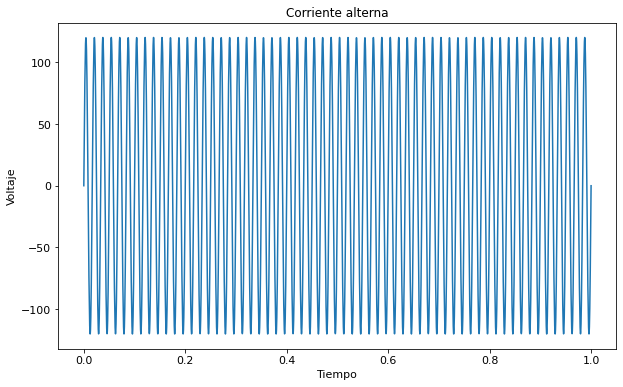

In [48]:
l = ltspice.Ltspice("corriente alterna.raw")
l.parse()
time = l.get_time()
V1 = l.get_data('V(1)')
plt.figure(figsize=(10,6))
plt.title("Corriente alterna")
plt.xlabel("Tiempo")
plt.ylabel("Voltaje")
plt.plot(time, V1)

Ahora utilizaremos `ahkab` para resolver el mismo problema. Graficamos también:

* Ejemplo en formato ahkab
V1 n1 0 type=vdc value=120 type=sin vo=0 va=120 freq=60 theta=0.0 td=0.0
R1 n1 n2 10000


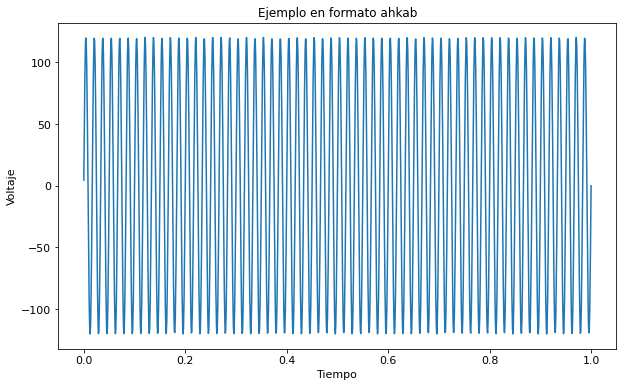

In [49]:
new_circuit = circuit.Circuit(title="Ejemplo en formato ahkab")
gnd = new_circuit.get_ground_node()

voltage_step = time_functions.sin(vo=0, va=120, freq=60)
new_circuit.add_vsource('V1', 'n1', gnd, ac_value=0, dc_value=120,function= voltage_step)

new_circuit.add_resistor("R1", n1="n1", n2="n2", value=10000)

print(new_circuit)

tran = new_tran(tstart=0,tstop=1,tstep=0.1,x0=None)
r = run(new_circuit,tran)['tran']

plt.figure(figsize=(10,6))
plt.title(new_circuit.title)
plt.plot(r['T'], r['VN1'])
plt.xlabel('Tiempo')
plt.ylabel('Voltaje')
plt.show()